# Data Wrangling and EDA

## Data Wrangling:

We will start here by importing the relevant libraries and the dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'data.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


As we can see here, we have 21 columns, the first one is irrelevant for us, which is the number of the clinet. The second column is what we are trying to predict which is the attirtion flag.

Let's drop CLIENTNUM and look at the other features and counts of NaN 

In [4]:
df = df.drop(columns=['CLIENTNUM'])

In [5]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

As we can see here, we dropped the column CLIENTNUM, and we don't have any NaN values. 
We can now explore unique values in categorical columns and see the distrbution of numerical ones to identify any outliars 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
numerical = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [8]:
categorical = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [9]:
for column in categorical:
    print(column,':\n',df[column].value_counts())

Gender :
 F    5358
M    4769
Name: Gender, dtype: int64
Education_Level :
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status :
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category :
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category :
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


We can see here in the categorical data, some of the features contain an "Unknown" observations.
However, as we do not have access to any sources that could point us of how to fill these values, and they aren't numerical, so we can' impute the median or mean, then we will leave them as they are

Furthermore, we can look next at the distribution of numerical features. 

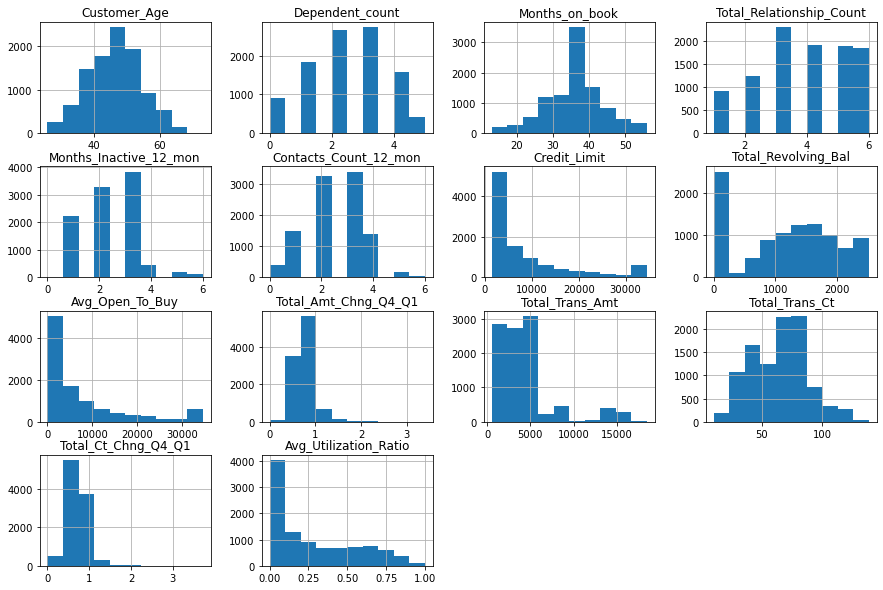

In [10]:
df.hist(figsize=(15,10));
plt.subplots_adjust(hspace=0.3);


As we can see from these figures, nothing is out of the ordinary except for the credit limit maximum observations, we can take a look at that by using describe, to get all statistical information of numerical columns, and checking for the unique values in that column

In [11]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
df['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

One thing we need to check for here to see if the values are duplicated somehow

In [13]:
df.duplicated().sum()

0

Since the observations are not duplicated and the 2 Credit limits with most occurances are the max and the min, which make sense as many people will have the minimum credit limit, while others have the maximum credit limit

## Exploratory Data Analysis:

We will start the Exploratory Data Analysis (EDA) step by looking at the correlation matrix, but first we need to change our target column into numerical

In [14]:
df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)
df['Attrition_Flag'].astype('int64')
df.rename(columns={'Attrition_Flag':'Attrited_Customer'},inplace=True)

In [15]:
corr = df.corr()

<AxesSubplot:>

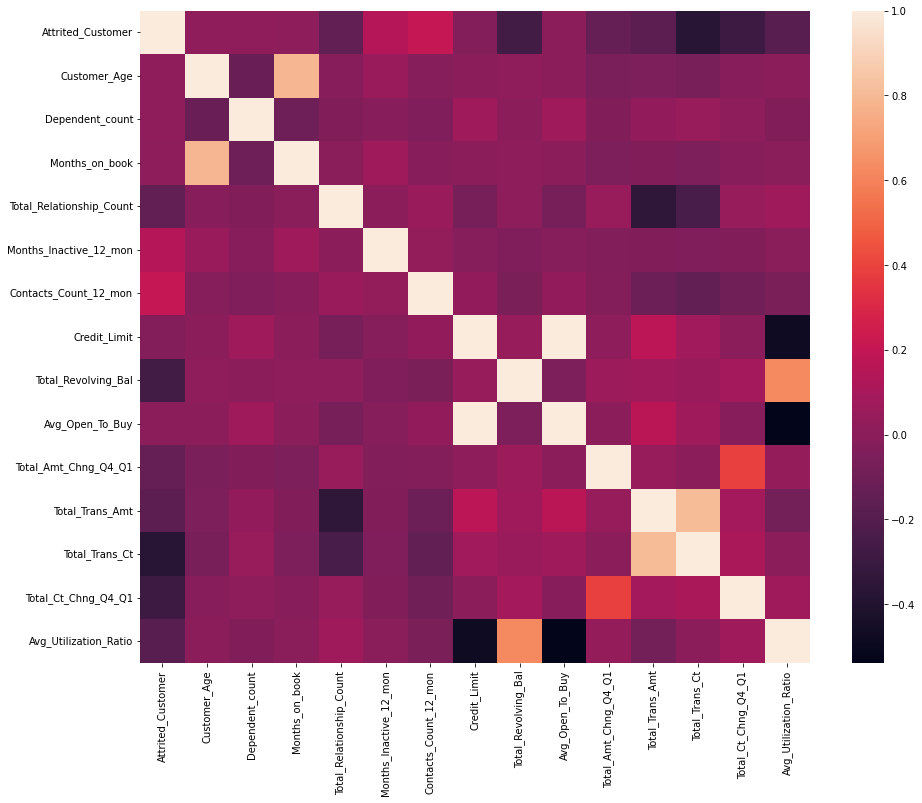

In [16]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr)

As we can see here, the most correlated columns are Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, and Abg_Utilization_Ratio, while we can see some other columns that are anticorreleted, like Contacts_Count_12_mon, which is an unusal relation.
Now we will plot some of our features to get a better understanding, we wil start with customer_age and dependent_count. 

<AxesSubplot:>

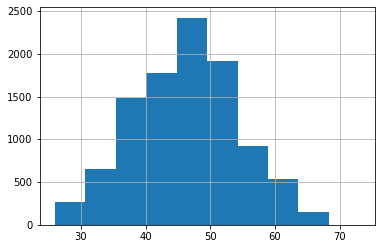

In [17]:
df['Customer_Age'].hist()

<AxesSubplot:>

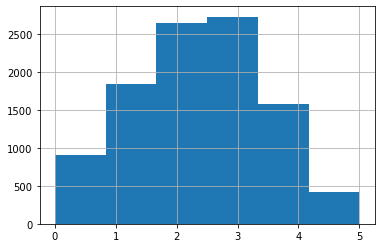

In [18]:
df['Dependent_count'].hist(bins=6)

We can explore some correlated features as well here, for example, Credit_Limit, and Avg_Open_to_Buy, and Total_trans_amt, and Total_trans_ct

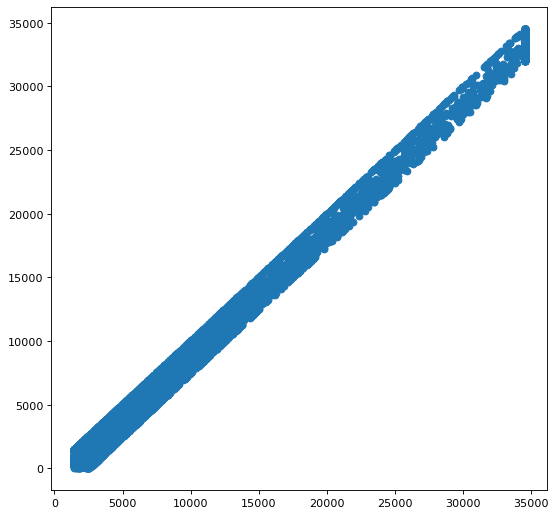

In [19]:
plt.figure(figsize=(8, 8), dpi=80);
plt.scatter(x=df['Credit_Limit'],y=df['Avg_Open_To_Buy']);
plt.show()

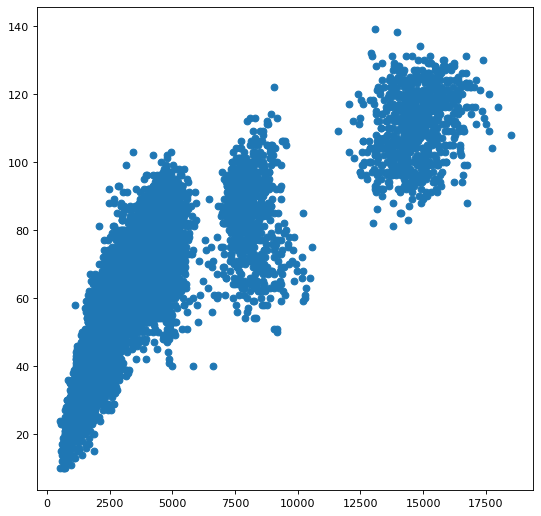

In [20]:
plt.figure(figsize=(8, 8), dpi=80);
plt.scatter(x=df['Total_Trans_Amt'],y=df['Total_Trans_Ct']);
plt.show()

As expected from the information we got through the heatmap, very high correlation in the first figure, and high correlation in the second figure. Now we will text the target feature against some of our features. 

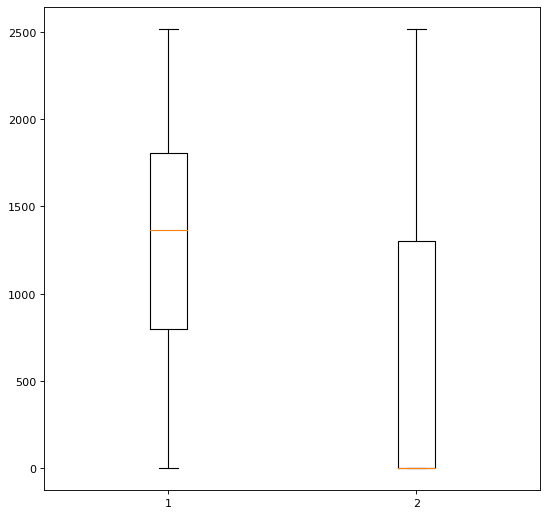

In [23]:
trb=[df['Total_Revolving_Bal'].loc[df['Attrited_Customer']==0],df['Total_Revolving_Bal'].loc[df['Attrited_Customer']==1]]
plt.figure(figsize=(8, 8), dpi=80);
plt.boxplot(x=trb);
plt.show()

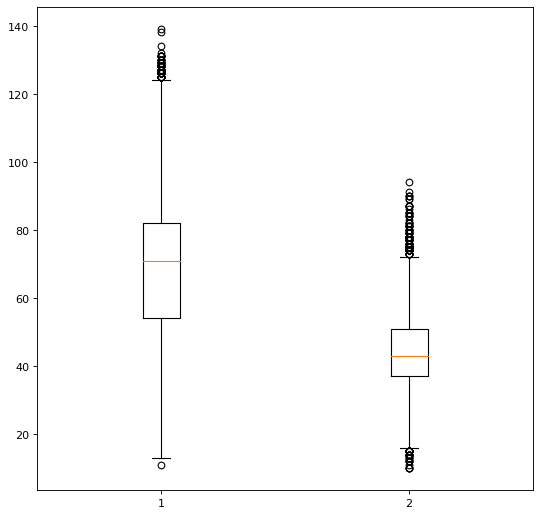

In [24]:
ttc=[df['Total_Trans_Ct'].loc[df['Attrited_Customer']==0],df['Total_Trans_Ct'].loc[df['Attrited_Customer']==1]]
plt.figure(figsize=(8, 8), dpi=80);
plt.boxplot(x=ttc);
plt.show()

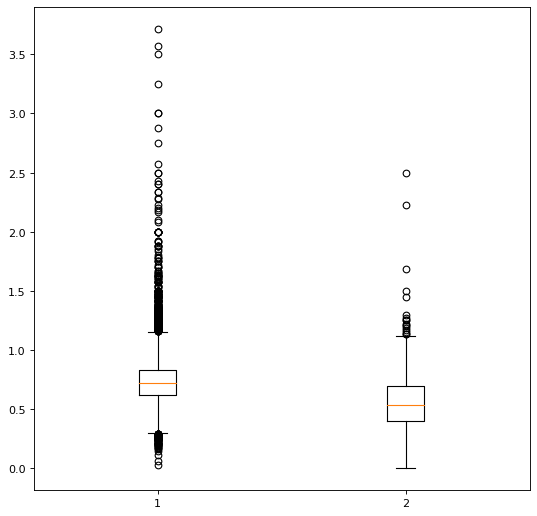

In [25]:
tccqq=[df['Total_Ct_Chng_Q4_Q1'].loc[df['Attrited_Customer']==0],df['Total_Ct_Chng_Q4_Q1'].loc[df['Attrited_Customer']==1]]
plt.figure(figsize=(8, 8), dpi=80);
plt.boxplot(x=tccqq);
plt.show()

As we can see with these featuers, we can see that there is  correlation with the target feature. We will be now moving on to Pre-Processing and Modeling, while using these valueable insights going into it.

In [26]:
df.to_csv('data2.csv', header=True, index=False)